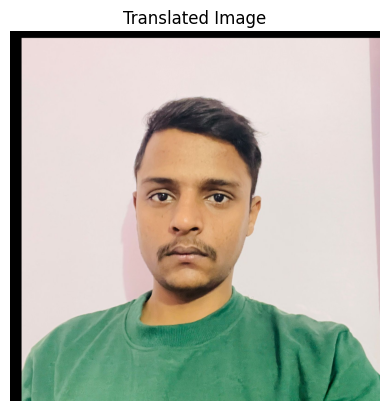

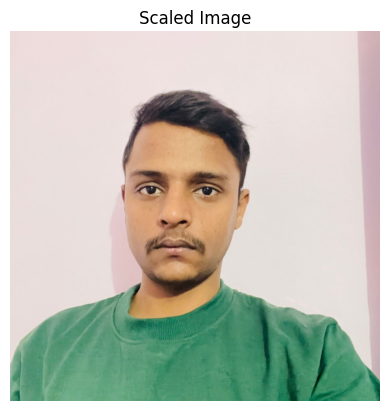

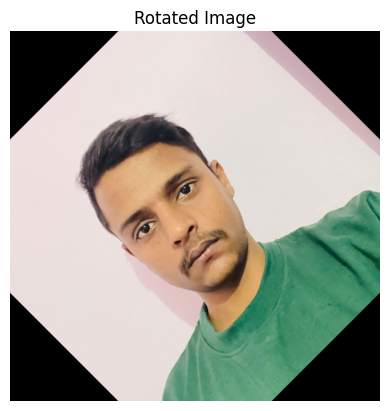

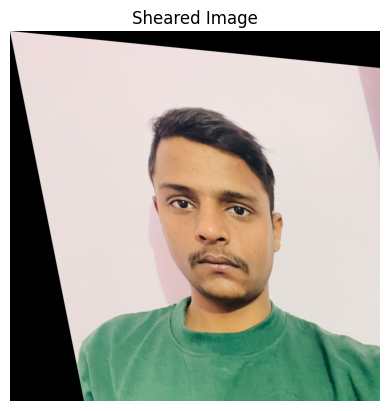

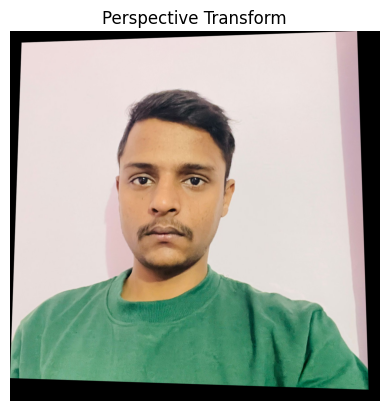

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread("4.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for display

# Function to display images
def display_image(title, img):
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')
    plt.show()

# 1. Translation
def translate(image, dx, dy):
    height, width = image.shape[:2]
    translation_matrix = np.float32([[1, 0, dx], [0, 1, dy]])
    translated = cv2.warpAffine(image, translation_matrix, (width, height))
    return translated

translated_image = translate(image, dx=50, dy=30)
display_image("Translated Image", translated_image)

# 2. Scaling
def scale(image, scale_x, scale_y):
    height, width = image.shape[:2]
    scaled = cv2.resize(image, None, fx=scale_x, fy=scale_y, interpolation=cv2.INTER_LINEAR)
    return scaled

scaled_image = scale(image, 1.5, 1.5)  # Enlarge by 1.5 times
display_image("Scaled Image", scaled_image)

# 3. Rotation
def rotate(image, angle, center=None, scale=1.0):
    height, width = image.shape[:2]
    if center is None:
        center = (width // 2, height // 2)
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, scale)
    rotated = cv2.warpAffine(image, rotation_matrix, (width, height))
    return rotated

rotated_image = rotate(image, angle=45)  # Rotate by 45 degrees
display_image("Rotated Image", rotated_image)

# 4. Shearing
def shear(image, shear_x, shear_y):
    height, width = image.shape[:2]
    shear_matrix = np.float32([[1, shear_x, 0], [shear_y, 1, 0]])
    sheared = cv2.warpAffine(image, shear_matrix, (width, height))
    return sheared

sheared_image = shear(image, shear_x=0.2, shear_y=0.1)
display_image("Sheared Image", sheared_image)

# 5. Perspective Transformation
def perspective_transform(image):
    height, width = image.shape[:2]
    src_points = np.float32([[0, 0], [width - 1, 0], [0, height - 1], [width - 1, height - 1]])
    dst_points = np.float32([[50, 50], [width - 100, 0], [0, height - 100], [width - 50, height - 50]])
    perspective_matrix = cv2.getPerspectiveTransform(src_points, dst_points)
    transformed = cv2.warpPerspective(image, perspective_matrix, (width, height))
    return transformed

perspective_image = perspective_transform(image)
display_image("Perspective Transform", perspective_image)


CV is use for image processing and to show image on window we need to use imshow commant for that 